# Project 6 - 뉴스기사 요약하기

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request

In [3]:
# urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")

다운받은 뉴스 기사 데이터를 data 폴더에 옮겨준다.

### (1) 데이터 수집하기

In [4]:
data = pd.read_csv('./data/news_summary_more.csv', encoding='iso-8859-1')

In [5]:
data.sample(10)

,headlines,text
47927,Only CBFC should have say in film's release: A...,While talking about delay in his film Aiyaary'...
43940,Japan firm to supply 'premium eggs' for Indian...,Indian badminton players training at the Hyder...
9553,My children my reason to get better through my...,"Actress Nafisa Ali, who revealed she has been ..."
39427,Govt seeks to use satellite to measure Yoga Da...,The Union Ayush Ministry has approached the In...
29205,"Sidhu's son, wife not to take govt posts after...",Punjab Minister Navjot Singh Sidhu has said hi...
52940,D'Arcy Short slams 122* to post highest-ever B...,Hobart Hurricanes' D'Arcy Short on Wednesday s...
50132,I only look like a smuggler when I have my bea...,"Shah Rukh Khan, while talking about the titula..."
7014,Pujara has started to play with a lot of matur...,Indian pacer Jasprit Bumrah praised teammate C...
43239,Harvey Weinstein would prefer it if I were dea...,"Actress Rose McGowan, while talking about Holl..."
62731,First-ever Ranji Trophy match ended on the fir...,"The first-ever Ranji Trophy match, played betw..."


### (2) 데이터 전처리

In [6]:
print("Total sample num :", len(data))

Total sample num : 98401


In [7]:
data.drop_duplicates(subset = ['text'], inplace=True)
data.dropna(axis=0, inplace=True)
print('Total unique sample num :', len(data))

Total unique sample num : 98360


정규화 사전, 불용어, 정규표현식을 이용하여 data preprocessing을 수행한다.

In [8]:
# text normalization
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}
print("contractions num :", len(contractions))

contractions num : 120


In [9]:
print(stopwords.words('english'))
print('stopwords num :', len(stopwords.words('english') ))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 제거
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경
    
    if remove_stopwords: # 불용어 제거 (text)
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    else: # 불용어 미제거 (headlines)
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
        
    return tokens

In [11]:
# 전체 text 데이터에 대한 전처리
clean_text = []
n = 1

for sentence in data['text']:
    clean_text.append(preprocess_sentence(sentence))
    
    if n % 1000 == 0:
        print(f"{n} / {len(data['text'])}")
        
    n += 1

print("text 전처리 결과 :", clean_text[:5])

1000 / 98360
2000 / 98360
3000 / 98360
4000 / 98360
5000 / 98360
6000 / 98360
7000 / 98360
8000 / 98360
9000 / 98360
10000 / 98360
11000 / 98360
12000 / 98360
13000 / 98360
14000 / 98360
15000 / 98360
16000 / 98360
17000 / 98360
18000 / 98360
19000 / 98360
20000 / 98360
21000 / 98360
22000 / 98360
23000 / 98360
24000 / 98360
25000 / 98360
26000 / 98360
27000 / 98360
28000 / 98360
29000 / 98360
30000 / 98360
31000 / 98360
32000 / 98360
33000 / 98360
34000 / 98360
35000 / 98360
36000 / 98360
37000 / 98360
38000 / 98360
39000 / 98360
40000 / 98360
41000 / 98360
42000 / 98360
43000 / 98360
44000 / 98360
45000 / 98360
46000 / 98360
47000 / 98360
48000 / 98360
49000 / 98360
50000 / 98360
51000 / 98360
52000 / 98360
53000 / 98360
54000 / 98360
55000 / 98360
56000 / 98360
57000 / 98360
58000 / 98360
59000 / 98360
60000 / 98360
61000 / 98360
62000 / 98360
63000 / 98360
64000 / 98360
65000 / 98360
66000 / 98360
67000 / 98360
68000 / 98360
69000 / 98360
70000 / 98360
71000 / 98360
72000 / 98360
7

In [12]:
# 전체 headlines 데이터에 대한 전처리
clean_headlines = []
n = 1

for sentence in data['headlines']:
    clean_headlines.append(preprocess_sentence(sentence, False))
    
    if n % 10000 == 0:
        print(f"{n} / {len(data['headlines'])}")
        
    n += 1

print("headlines 전처리 후 결과 :", clean_headlines[:5])

10000 / 98360
20000 / 98360
30000 / 98360
40000 / 98360
50000 / 98360
60000 / 98360
70000 / 98360
80000 / 98360
90000 / 98360
headlines 전처리 후 결과 : ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


전처리 과정은 시간이 오래 걸리므로 새로운 데이터프레임 및 csv에 저장해놓는다.

In [13]:
data = pd.DataFrame()

data['headlines'] = clean_headlines
data['text'] = clean_text

In [14]:
data_path = "./data/preprocessing_news_summary_more.csv"
data.to_csv(data_path)

In [16]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [17]:
print('Total clean data num :', (len(data)))

Total clean data num : 98360


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


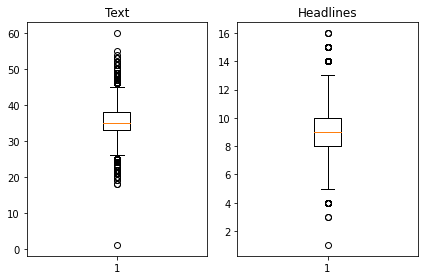

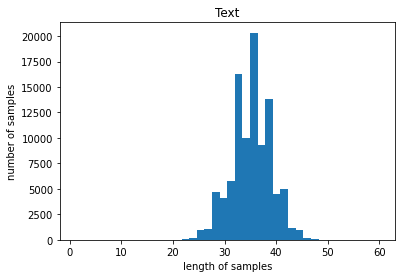

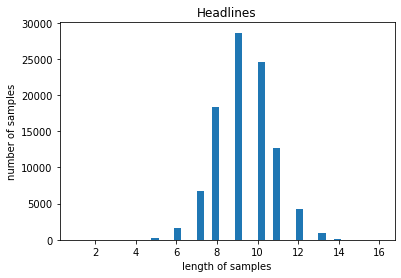

In [16]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [23]:
text_max_len = 40
headlines_max_len = 11

In [24]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [25]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len, data['headlines'])

전체 샘플 중 길이가 40 이하인 샘플의 비율: 0.9238714924766165
전체 샘플 중 길이가 11 이하인 샘플의 비율: 0.9449877999186661


### (3) input, output 데이터 나누기

In [26]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]

print('전체 샘플수 :', (len(data)))

전체 샘플수 : 85843


In [27]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
7,govt directs alok verma to join work day befor...,weeks ex cbi director alok verma told departme...,sostoken govt directs alok verma to join work ...,govt directs alok verma to join work day befor...


In [28]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [29]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[25403  5240 44734 ... 15461 21048 74096]


In [30]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [31]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 17168


In [32]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 68675
훈련 레이블의 개수 : 68675
테스트 데이터의 개수 : 17168
테스트 레이블의 개수 : 17168


### (4) 정수 인코딩

__source tokenizing__

In [33]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [34]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 64621
등장 빈도가 6번 이하인 희귀 단어의 수: 44052
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 20569
단어 집합에서 희귀 단어의 비율: 68.16979000634468
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.774823242872071


In [35]:
src_vocab = 20000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [36]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[160, 19, 59, 548, 571, 1275, 31, 5068, 4167, 446, 546, 71, 103, 7, 2790, 7882, 37, 7, 1046, 2231, 19188, 829, 199, 2790, 1037, 320], [76, 4697, 12671, 79, 3434, 1771, 731, 3659, 12671, 79, 11807, 19189, 179, 70, 3327, 247, 404, 17063, 3679, 931, 6385, 3659, 2830, 19189, 4168, 2077, 12671, 4, 2903, 572, 120, 3328, 1038, 731], [95, 375, 13131, 6665, 63, 2232, 1203, 1679, 2056, 3991, 1150, 3212, 630, 95, 63, 2232, 1690, 15410, 888, 3212, 16178, 5, 27, 1]]


__target tokenizing__

In [37]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [40]:
threshold = 5
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 28457
등장 빈도가 4번 이하인 희귀 단어의 수: 17619
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10838
단어 집합에서 희귀 단어의 비율: 61.91446744210564
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.361425797112699


In [41]:
tar_vocab = 10000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

In [42]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 67, 611, 1800, 3, 1896, 135, 66, 2796], [1, 101, 1975, 331, 1897, 447, 245, 2797, 8825], [1, 1898, 1857, 13, 1694, 4745], [1, 35, 2287, 1611, 1034, 5, 2149, 148], [1, 433, 658, 151, 3, 12, 795, 5, 659, 557, 206, 779]]
target
decoder  [[67, 611, 1800, 3, 1896, 135, 66, 2796, 2], [101, 1975, 331, 1897, 447, 245, 2797, 8825, 2], [1898, 1857, 13, 1694, 4745, 2], [35, 2287, 1611, 1034, 5, 2149, 148, 2], [433, 658, 151, 3, 12, 795, 5, 659, 557, 206, 779, 2]]


In [43]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 68675
훈련 레이블의 개수 : 68675
테스트 데이터의 개수 : 17168
테스트 레이블의 개수 : 17168


In [44]:
# Padding
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')

decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

### (5) 모델 설계하기

__LSTM 3층으로 Encoder를 설계한다.__

In [45]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
# recurrent dropout을 사용할 시 cuDNN을 사용할 수 없어서 recurrent dropout을 사용하지 않을 때보다 학습 시간이 오래 걸림
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

__LSTM 1층으로 Decoder를 설계한다.__

In [50]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [51]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

__최종 모델의 형태는 다음과 같다.__

In [52]:
# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 128)      2560000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 40, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

### (6) 어텐션 메커니즘 적용

In [53]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 128)      2560000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 40, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

### (7) 모델 훈련하기

__Early Stopping__
> val_loss을 관찰하다가, 검증 데이터의 손실이 줄어들지 않고 증가하는 현상이 n회(patience) 관측되면 학습을 멈추는 방식  
> EarlyStopping이 작동하면 epochs가 아무리 크게 설정되어 있어도 모델 훈련을 최적점에서 멈출 수 있다.  

> 단, patience가 0이 아닌 경우에는 훈련이 종료되었을 때 성능이 최고인 상황이 아닐 수 있다.  
> 그래서 보통 학습 중에 모델을 저장하는 callback 함수를 같이 사용한다.

In [54]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
269/269 [==============================] - 68s 99ms/step - loss: 6.0417 - val_loss: 5.6161
Epoch 2/50
269/269 [==============================] - 29s 107ms/step - loss: 5.4796 - val_loss: 5.2465
Epoch 3/50
269/269 [==============================] - 30s 113ms/step - loss: 5.1305 - val_loss: 4.9748
Epoch 4/50
269/269 [==============================] - 31s 115ms/step - loss: 4.8486 - val_loss: 4.8167
Epoch 5/50
269/269 [==============================] - 30s 112ms/step - loss: 4.6242 - val_loss: 4.6190
Epoch 6/50
269/269 [==============================] - 31s 114ms/step - loss: 4.4393 - val_loss: 4.5099
Epoch 7/50
269/269 [==============================] - 31s 114ms/step - loss: 4.2797 - val_loss: 4.4339
Epoch 8/50
269/269 [==============================] - 31s 114ms/step - loss: 4.1357 - val_loss: 4.3335
Epoch 9/50
269/269 [==============================] - 31s 114ms/step - loss: 4.0077 - val_loss: 4.2698
Epoch 10/50
269/269 [==============================] - 31s 114ms/step - lo

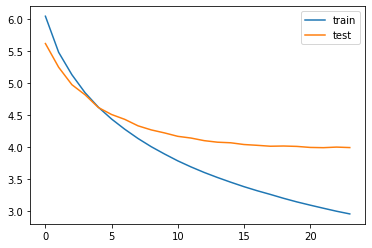

In [55]:
# 데이터 시각화
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### (8) 인퍼런스 모델 구현

seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행해야 한다.

In [56]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [57]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [58]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [59]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token != 'eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

### (9) 모델 테스트 - 실제 결과와 요약문 비교

In [60]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp = ''
    for i in input_seq:
        if (i != 0):
            temp = temp + src_index_to_word[i] + ' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2headlines(input_seq):
    temp = ''
    for i in input_seq:
        if((i != 0 and i != tar_word_to_index['sostoken']) and i != tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp 

In [61]:
for i in range(50, 80):
    print("Original:", seq2text(encoder_input_test[i]))
    print("Summary:", seq2headlines(decoder_input_test[i]))
    print("Abstract:", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

Original: news anchor radhika kaushik died falling fourth floor apartment building noida friday morning police said party going flat time incident recovered bottles alcohol police claimed kaushik co anchor also flat reportedly argument fell 
Summary: news anchor dies after falling from th floor during party 
Abstract:  singer singer passes away at


Original: shares mandhana retail ventures salman khan human fell much day high actor convicted blackbuck poaching case however shares recovered losses ended day lower court sentenced salman five years prison imposed fine 
Summary: being human stock fell after salman verdict 
Abstract:  akshay kumar shares his house of house


Original: around computers connected gujarat government information technology network hit ransomware wannacry senior government official confirmed monday affected computers said data encrypted demanded bitcoins affected computer valuable data could adversely impact government functioning another official added 
Summar

Abstract:  harbhajan and fan to be the india coach


Original: us based smartphone app maker labs developed app called lets users hide notch apple iphone users choose pre loaded backgrounds within conceal notch import photos images notch free wallpaper iphone however hide notch apps running 
Summary: app lets users hide the in apple iphone 
Abstract:  apple lets users iphone without face id made


Original: first team comprising scottish south african researchers demonstrated entanglement swapping orbital momentum patterns light property entanglement allows transfer information without physically transferring photons quantum light interfering photons information useless making signal 
Summary: physicists quantum light for first time 
Abstract:  world smallest quantum


Original: around villages madhya pradesh allegedly given false open defecation free certificates swachh bharat abhiyan additional district magistrate district khan formed teams verify claims found people defecating open 

### (10) 추출적 요약 - Summa 이용

In [62]:
import requests
from summa.summarizer import summarize

In [63]:
origin_data = pd.read_csv('./data/news_summary_more.csv', encoding='iso-8859-1')

In [69]:
origin_text = origin_data['text']

In [74]:
abstract = []
extract = []

for i in range(50, 80):
    a = decode_sequence(encoder_input_test[i].reshape(1, text_max_len))
    e = summarize(origin_text[i], ratio=0.5)
    print("Abstract:", a)
    print("Extract:", e)
    print("\n")
    abstract.append(a)
    extract.append(e)

Abstract:  singer singer passes away at
Extract: Former Finance Minister Yashwant Sinha on Tuesday demanded a probe into the alleged diversion of loans worth Ã¢ÂÂ¹31,000 crore by Dewan Housing Finance (DHFL).


Abstract:  akshay kumar shares his house of house
Extract: Boeing retained its position as the world's largest planemaker for the seventh straight year, delivering 806 aircraft in 2018.


Abstract:  govt to provide data to prevent data from users
Extract: 


Abstract:  china becomes st to become dangal in china
Extract: Further, its OnePlus 6 emerged as the highest selling premium smartphone of 2018 followed by OnePlus 6T.


Abstract:  trump cannot be like to be like us prez trump
Extract: Filmmaker Pooja Bhatt, while talking about the presentation of women in her films, said, "I can never look at a female body, even if it's naked, in a vulgar manner." "Our audience can say...the women in my films are bold or sensual, but never ever vulgar," she added.


Abstract:  reliance jio